## Data Gathering

In [1]:
## Import all useful libraries
import matplotlib
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import datetime
import re
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

%matplotlib inline

In [2]:
# read csv as a Pandas DataFrame
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

open('image_prediction.tsv', 'wb').write(response.content)

335079

In [5]:
df_image_predictions = pd.read_csv('image_prediction.tsv', sep='\t')
df_image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 'WL0ThfkNTaKCcsCPWVxWhyxza'
consumer_secret = 'GeG37psL6YyJXq8stshubxaLfHqDnuDfPqzWxzj7iWTPGlQz1y'
access_token = '1093279944229044224-lLZQPidHH0wnUZ8zK2l1oaLPlRmYCs'
access_secret = 'PNFIyuUssmXARAfgb44oFnFVPmmLVjqoETOrUI9oqWw8Q'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
# get tweet status by passing index value
tweet = api.get_status(df_archive.tweet_id[7], tweet_mode='extended')

In [8]:
# create tweet_json.txt file if it is not exixted before
file = 'tweet_json.txt'
if not os.path.isfile(file):
    open(file, 'w', encoding = 'UTF-8')

In [9]:
# create a tweet id list
tweet_ids = df_archive.tweet_id.values

In [10]:
# list of tweet ids from twitter archive data set
df_tweet_ids = df_archive['tweet_id']

# creating a list for tweets with exceptions/errors 
tweets_error_list = []

# List of tweets
df_tweets = []

# start time of execution
start = time.time()

# For loop which will add each available tweet json to df_list
for tweet_id in df_tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json 
        
        favorites = tweet['favorite_count'] # number of favorites for the tweet
        retweets = tweet['retweet_count'] # number of retweets
        user_followers = tweet['user']['followers_count'] # number of followers of the user who tweeted
        user_favourites = tweet['user']['favourites_count'] # number of favourites for the user who tweeted
        date_time = tweet['created_at'] # the timestamp i.e. date and time of creation of the tweet
        
        df_tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        tweets_error_list.append(tweet_id)
        
# end time for excution
end = time.time()

#print time for execution
print("Total time taken for execution", end - start)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 _ [{'code

In [11]:
# total no. of tweets received from API
print("The lengh of the result", len(df_tweets))

# Total no. of errors received from API
print("The lengh of the errors", len(tweets_error_list))

The lengh of the result 2331
The lengh of the errors 25


In [12]:
# create DataFrames with columns I want to use
df_tweets_json = pd.DataFrame(df_tweets, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
# the dataFrame is saved to tweet_json.txt file as per project requirement
df_tweets_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [13]:
# Read the saved tweet_json.txt file into a dataframe
df_api_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

In [14]:
df_api_data.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,35039,7363,8968977,145781,2017-08-01 16:23:56
1,892177421306343426,30345,5490,8968977,145781,2017-08-01 00:17:27
2,891815181378084864,22806,3630,8968977,145781,2017-07-31 00:18:03
3,891689557279858688,38313,7543,8968977,145781,2017-07-30 15:58:51
4,891327558926688256,36583,8132,8968977,145781,2017-07-29 16:00:24


In [15]:
df_api_data.info() # give you summary statistic of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
tweet_id           2331 non-null int64
favorites          2331 non-null int64
retweets           2331 non-null int64
user_followers     2331 non-null int64
user_favourites    2331 non-null int64
date_time          2331 non-null object
dtypes: int64(5), object(1)
memory usage: 109.3+ KB


The 3 dataframes are:-
df_archive - contains data read from provided csv
df_image_predictions - contains data read (by using requests) from tsv file hosted on server
df_api_data - contains data obtained from twitter handle by using tweepy library and creating a twitter app for oauth

# Assessing Data

In [16]:
df_archive.sample(15) # i will check only sample data of size 15

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1777,677918531514703872,NaN,NaN,2015-12-18 18:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Everything looks pretty good in there. Make s...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/677918531...,10,10,None,None,None,None,None
834,768473857036525572,NaN,NaN,2016-08-24 15:43:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chevy. He had a late breakfast and now ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768473857...,11,10,Chevy,None,None,None,None
308,835574547218894849,NaN,NaN,2017-02-25 19:37:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eli. He works backstage at Bone Jovi c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835574547...,11,10,Eli,None,None,None,None
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,None,None,None,puppo
1488,692919143163629568,NaN,NaN,2016-01-29 03:56:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please only send in dogs. Don't submit other t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692919143...,9,10,None,None,None,None,None
1359,703356393781329922,NaN,NaN,2016-02-26 23:10:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Socks. That water pup w the super legs...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703356393...,9,10,Socks,None,None,None,None
1698,681193455364796417,NaN,NaN,2015-12-27 19:22:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Aspen. He's astronomically fluffy. I w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681193455...,11,10,Aspen,None,None,None,None
1757,678764513869611008,NaN,NaN,2015-12-21 02:30:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Wilson. He got caught humping the futon. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678764513...,10,10,Wilson,None,None,None,None
383,827199976799354881,NaN,NaN,2017-02-02 17:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He wins every game of chess h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827199976...,13,10,Charlie,None,None,None,None
2104,670668383499735048,NaN,NaN,2015-11-28 18:19:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a magical dog. Only appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670668383...,10,10,Phineas,None,None,None,None


In [17]:
df_archive.source.value_counts()

df_archive[df_archive['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [18]:
df_archive[df_archive['name'].apply(len) <= 2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
686,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None


In [19]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [20]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
df_image_predictions.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1657,810896069567610880,https://pbs.twimg.com/media/C0DhpcrUAAAnx88.jpg,1,flat-coated_retriever,0.820804,True,Labrador_retriever,0.082318,True,curly-coated_retriever,0.067461,True
1891,849051919805034497,https://pbs.twimg.com/media/C8hwNxbXYAAwyVG.jpg,1,fountain,0.997509,False,American_black_bear,0.001413,False,sundial,0.000681,False
994,708130923141795840,https://pbs.twimg.com/media/CdPJUWIWIAAIchl.jpg,1,French_bulldog,0.710354,True,Chihuahua,0.262302,True,Cardigan,0.006904,True
659,682393905736888321,https://pbs.twimg.com/media/CXhZom1UwAA4Zz6.jpg,1,vizsla,0.657275,True,paddle,0.090286,False,Rhodesian_ridgeback,0.048228,True
759,688804835492233216,https://pbs.twimg.com/media/CY8gWFRWUAAm1XL.jpg,3,malinois,0.199512,True,German_shepherd,0.096797,True,Saluki,0.082848,True
655,682242692827447297,https://pbs.twimg.com/media/CXfQG_fW8AAjVhV.jpg,1,snorkel,0.504983,False,loggerhead,0.345298,False,scuba_diver,0.074754,False
1683,813944609378369540,https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg,1,Labrador_retriever,0.427742,True,Great_Dane,0.190503,True,curly-coated_retriever,0.146427,True
476,675153376133427200,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,1,paper_towel,0.327957,False,mailbox,0.096027,False,seat_belt,0.034995,False
1161,734787690684657664,https://pbs.twimg.com/media/CjJ9gQ1WgAAXQtJ.jpg,4,golden_retriever,0.883991,True,chow,0.023542,True,Labrador_retriever,0.016056,True
2031,883117836046086144,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg,2,golden_retriever,0.949562,True,Labrador_retriever,0.045948,True,kuvasz,0.002471,True


In [22]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
df_api_data.sample(15)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
1028,742528092657332225,4265,1876,8968994,145782,2016-06-14 01:24:27
140,863471782782697472,0,2180,8968978,145781,2017-05-13 19:11:30
203,851861385021730816,0,19,8968978,145781,2017-04-11 18:15:55
2263,667176164155375616,559,414,8968997,145782,2015-11-19 03:02:47
748,777641927919427584,0,4113,8968983,145781,2016-09-18 22:54:18
1773,677228873407442944,3373,1545,8968992,145782,2015-12-16 20:48:40
711,781955203444699136,10952,3290,8968983,145781,2016-09-30 20:33:43
2244,667509364010450944,6310,1942,8968997,145782,2015-11-20 01:06:48
1983,672256522047614977,2627,1408,8968999,145782,2015-12-03 03:30:19
429,819227688460238848,22629,6526,8968979,145781,2017-01-11 17:01:16


In [25]:
df_api_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
tweet_id           2331 non-null int64
favorites          2331 non-null int64
retweets           2331 non-null int64
user_followers     2331 non-null int64
user_favourites    2331 non-null int64
date_time          2331 non-null object
dtypes: int64(5), object(1)
memory usage: 109.3+ KB


In [26]:
df_api_data.describe()


,tweet_id,favorites,retweets,user_followers,user_favourites
count,2.331000e+03,2331.000000,2331.000000,2.331000e+03,2331.000000
mean,7.419079e+17,7317.692836,2590.513514,8.968996e+06,145781.635779
std,6.823170e+16,11365.421309,4382.228633,6.357271e+01,0.495376
min,6.660209e+17,0.000000,1.000000,8.968977e+06,145781.000000
25%,6.782670e+17,1269.500000,525.000000,8.968980e+06,145781.000000
50%,7.182469e+17,3174.000000,1209.000000,8.968992e+06,145782.000000
75%,7.986692e+17,8946.500000,3000.000000,8.968994e+06,145782.000000
max,8.924206e+17,150651.000000,74351.000000,8.969590e+06,145783.000000


In [27]:
df_api_data[df_api_data.duplicated(['user_favourites'], keep=False)]

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,35039,7363,8968977,145781,2017-08-01 16:23:56
1,892177421306343426,30345,5490,8968977,145781,2017-08-01 00:17:27
2,891815181378084864,22806,3630,8968977,145781,2017-07-31 00:18:03
3,891689557279858688,38313,7543,8968977,145781,2017-07-30 15:58:51
4,891327558926688256,36583,8132,8968977,145781,2017-07-29 16:00:24
5,891087950875897856,18451,2724,8968977,145781,2017-07-29 00:08:17
6,890971913173991426,10736,1762,8968977,145781,2017-07-28 16:27:12
7,890729181411237888,58989,16497,8968977,145781,2017-07-28 00:22:40
8,890609185150312448,25400,3772,8968977,145781,2017-07-27 16:25:51
9,890240255349198849,28965,6392,8968977,145781,2017-07-26 15:59:51


After gathering the data,I assessed data. I came up with the following
issues with it:-
                        
                        Tidiness issues
                        
1. Combine three different dataframes into one master data set
2. Remove unwanted columns (retweeted_status_timestamp, retweeted_status_user_id,retweeted_status_id ) and clean the duplicate rows and NaNs
                        Quality isuues
                        
3. Clean sources columns, which is difficult to as such
4. Refine respective predictions and confidence columns
5. Combine and clean different life stages of dog(eg: pupper,doggo) columns into one
6. Clean text column to get dog gender
7. Drop columns with one low values or similar values
8. Fix numerator and denominators
9. Convert NaNs/Nulls to None
10. Fix datatypes of various columns


# Data Cleaning


In [28]:
#copy dataframes
df_archive_clean = df_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_api_data_clean = df_api_data.copy()

Step1-Define

Sort out the structural issue i.e. there should be one master table instead of 3 tables. Thus we will merge them into one dataframe and we will have only single dataframe to clean and process.


Step2-Code

In [29]:
df_archive_clean = pd.merge(left=df_archive_clean,
                                 right=df_api_data_clean, left_on='tweet_id', right_on='tweet_id', how='inner')
df_archive_clean = df_archive_clean.merge(df_image_predictions_clean, on='tweet_id', how='inner')

Test

In [30]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 33 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
doggo                         2059 non-null object
floofer                       2059 non-null object
pupper                        2059 non-null object
puppo                         2059 non-null object
favorites                     2059 

Define

Clean the content of source column, make it more readable.

Code

In [31]:
df_archive_clean['source'] = df_archive_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

Test

In [32]:
df_archive_clean['source'].value_counts()

Twitter for iPhone    2019
Twitter Web Client      30
TweetDeck               10
Name: source, dtype: int64

Define

Refine respective predictions (p1, p2 and p3 column)and confidence by combining

Code

In [33]:
# store the true algo with it's level of confidence and if false put NaN as confidence
prediction = []
confidence = []

def get_prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        prediction.append(dataframe['p1'])
        confidence.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        prediction.append(dataframe['p2'])
        confidence.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        prediction.append(dataframe['p3'])
        confidence.append(dataframe['p3_conf'])
    else:
        prediction.append('NaN')
        confidence.append(0)

df_archive_clean.apply(get_prediction_confidence, axis=1)
df_archive_clean['prediction'] = prediction
df_archive_clean['confidence'] = confidence

# drop the not required columns of image prediction information
df_archive_clean = df_archive_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

Test

In [34]:
#check if 2 new columns have been added and not required columns have been dropped
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 25 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
doggo                         2059 non-null object
floofer                       2059 non-null object
pupper                        2059 non-null object
puppo                         2059 non-null object
favorites                     2059 

Define

Define new column for life stages of dog by using melting the 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column life_stage.


Code

In [35]:
melt_columns = ['doggo', 'floofer', 'pupper', 'puppo']
stay_columns = [x for x in df_archive_clean.columns.tolist() if x not in melt_columns]

In [36]:
# Melt the the columns into values
df_archive_clean = pd.melt(df_archive_clean, id_vars = stay_columns, value_vars = melt_columns, 
                         var_name = 'stages', value_name = 'life_stage')

In [37]:
# Delete column 'stages'
df_archive_clean = df_archive_clean.drop('stages', 1)


Test

In [38]:
#check if doggo', 'floofer', 'pupper', 'puppo' have been dropped and new column 'life_stage' has been added.
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8236 entries, 0 to 8235
Data columns (total 22 columns):
tweet_id                      8236 non-null int64
in_reply_to_status_id         92 non-null float64
in_reply_to_user_id           92 non-null float64
timestamp                     8236 non-null object
source                        8236 non-null object
text                          8236 non-null object
retweeted_status_id           288 non-null float64
retweeted_status_user_id      288 non-null float64
retweeted_status_timestamp    288 non-null object
expanded_urls                 8236 non-null object
rating_numerator              8236 non-null int64
rating_denominator            8236 non-null int64
name                          8236 non-null object
favorites                     8236 non-null int64
retweets                      8236 non-null int64
user_followers                8236 non-null int64
user_favourites               8236 non-null int64
date_time                     8236 n

In [39]:
# check all types in life_Stage column
df_archive_clean.life_stage.value_counts()

None       7905
pupper      221
doggo        78
puppo        24
floofer       8
Name: life_stage, dtype: int64

Define

Get the dog gender from text column by filtering common phrases (he/she,his/her etc.) and assigning a gender. Using 'NaN' if no gender can be inferred from text.

Code

In [40]:
# Loop on all the texts and check if it has one of pronouns of male or female; add that to list.

m_pnouns = ['He', 'he', 'him', 'his', "he's", 'himself']
f_pnouns = ['She', 'she', 'her', 'hers', 'herself', "she's"]

gender = []

for text in df_archive_clean['text']:
    # Male
    if any(map(lambda v:v in m_pnouns, text.split())):
        gender.append('male')
    # Female
    elif any(map(lambda v:v in f_pnouns, text.split())):
        gender.append('female')
    # If group or not specified
    else:
        gender.append('NaN')

#add a new column for dog gender
df_archive_clean['dog_gender'] = gender

Test

In [41]:
# check the values in new column dog_gender
df_archive_clean.dog_gender.value_counts()

NaN       4688
male      2596
female     952
Name: dog_gender, dtype: int64

Define

Clean data by dropping duplicates row and not meaningful columns.

Code

In [42]:

# Delete the retweets
df_archive_clean = df_archive_clean[pd.isnull(df_archive_clean.retweeted_status_id)]

# Delete columns we don't need 
df_archive_clean = df_archive_clean.drop('retweeted_status_id', 1)
df_archive_clean = df_archive_clean.drop('retweeted_status_user_id', 1)
df_archive_clean = df_archive_clean.drop('retweeted_status_timestamp', 1)
df_archive_clean = df_archive_clean.drop('date_time', 1) #imported from the API but has same values as timestamp column

# Delete duplicated tweet_id
df_archive_clean = df_archive_clean.drop_duplicates()

# Delete tweets with no images
df_archive_clean = df_archive_clean.dropna(subset = ['jpg_url'])

#Delete dog_stage duplicates
df_archive_clean = df_archive_clean.sort_values('life_stage').drop_duplicates('tweet_id', keep = 'last')

Test

In [43]:
# check the number of records after cleaning. 
print("Number of records", len(df_archive_clean))
df_archive_clean.info()
df_archive_clean.sample(15)

Number of records 1987
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 7053
Data columns (total 19 columns):
tweet_id                 1987 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1987 non-null object
source                   1987 non-null object
text                     1987 non-null object
expanded_urls            1987 non-null object
rating_numerator         1987 non-null int64
rating_denominator       1987 non-null int64
name                     1987 non-null object
favorites                1987 non-null int64
retweets                 1987 non-null int64
user_followers           1987 non-null int64
user_favourites          1987 non-null int64
jpg_url                  1987 non-null object
prediction               1987 non-null object
confidence               1987 non-null float64
life_stage               1987 non-null object
dog_gender               1987 non-null object
dtyp

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,user_favourites,jpg_url,prediction,confidence,life_stage,dog_gender
1401,682389078323662849,NaN,NaN,2015-12-31 02:33:29 +0000,Twitter for iPhone,Meet Brody. He's a Downton Abbey Falsetto. Add...,https://twitter.com/dog_rates/status/682389078...,9,10,Brody,1603,446,8968992,145782,https://pbs.twimg.com/media/CXhVKtvW8AAyiyK.jpg,curly-coated_retriever,0.482288,None,male
1851,669942763794931712,NaN,NaN,2015-11-26 18:16:16 +0000,Twitter for iPhone,This is Andru. He made his very own lacrosse s...,https://twitter.com/dog_rates/status/669942763...,11,10,Andru,466,145,8968999,145782,https://pbs.twimg.com/media/CUwdYL5UsAAP0XX.jpg,vizsla,0.743216,None,male
372,815990720817401858,NaN,NaN,2017-01-02 18:38:42 +0000,Twitter for iPhone,Meet Jack. He's one of the rare doggos that do...,https://www.gofundme.com/surgeryforjacktheminp...,11,10,Jack,4857,989,8968980,145781,https://pbs.twimg.com/media/C1L7OVVWQAIQ6Tt.jpg,Chihuahua,0.428756,None,NaN
2056,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,107,39,8968997,145782,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,None,NaN
1787,670823764196741120,NaN,NaN,2015-11-29 04:37:03 +0000,Twitter for iPhone,This is Remington. He's a man dime. 12/10 http...,https://twitter.com/dog_rates/status/670823764...,12,10,Remington,716,169,8968999,145782,https://pbs.twimg.com/media/CU8-puBWwAAR8Xl.jpg,Labrador_retriever,0.947453,None,NaN
2035,666345417576210432,NaN,NaN,2015-11-16 20:01:42 +0000,Twitter for iPhone,Look at this jokester thinking seat belt laws ...,https://twitter.com/dog_rates/status/666345417...,10,10,None,266,128,8968997,145782,https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg,golden_retriever,0.858744,None,NaN
665,767884188863397888,NaN,NaN,2016-08-23 00:40:31 +0000,Twitter for iPhone,This is Tito. He's on the lookout. Nobody know...,https://twitter.com/dog_rates/status/767884188...,10,10,Tito,4635,1333,8968983,145781,https://pbs.twimg.com/media/CqgSl4DWcAA-x-o.jpg,NaN,0.000000,None,NaN
1991,667177989038297088,NaN,NaN,2015-11-19 03:10:02 +0000,Twitter for iPhone,This is a Dasani Kingfisher from Maine. His na...,https://twitter.com/dog_rates/status/667177989...,8,10,a,177,50,8968997,145782,https://pbs.twimg.com/media/CUJK18UWEAEg7AR.jpg,vizsla,0.259249,None,NaN
5582,679503373272485890,NaN,NaN,2015-12-23 03:26:43 +0000,Twitter for iPhone,This is Dwight. He's a pointy pupper. Very doc...,https://twitter.com/dog_rates/status/679503373...,8,10,Dwight,3032,1391,8968992,145782,https://pbs.twimg.com/media/CW4UtmYWsAAEjqA.jpg,NaN,0.000000,pupper,NaN
1899,668892474547511297,NaN,NaN,2015-11-23 20:42:48 +0000,Twitter for iPhone,This is Ruffles. He is an Albanian Shoop Da Wh...,https://twitter.com/dog_rates/status/668892474...,11,10,Ruffles,371,135,8968999,145782,https://pbs.twimg.com/media/CUhiJ63WEAAw2qm.jpg,kelpie,0.421979,None,male


In [44]:
df_archive_clean.life_stage.value_counts()

None       1682
pupper      212
doggo        62
puppo        23
floofer       8
Name: life_stage, dtype: int64

Define

Drop columns with one low values or similar values.
- One value in in_reply_to_user_id so we will delete the columns of reply all     of them replying to @dog_rates.
- user_favourites has 2 values and they are close.

Code

In [45]:
# let's check low values.. 
print('in_reply_to_user_id ')
print(df_archive_clean['in_reply_to_user_id'].value_counts())
print('user_favourites ')
print(df_archive_clean['user_favourites'].value_counts())
# drop the following columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'user_favourites'
df_archive_clean = df_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'user_favourites'], 1)


in_reply_to_user_id 
4.196984e+09    23
Name: in_reply_to_user_id, dtype: int64
user_favourites 
145782    1327
145781     644
145783      16
Name: user_favourites, dtype: int64


Test

In [46]:
# check if the above columns have been deleted.
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 7053
Data columns (total 16 columns):
tweet_id              1987 non-null int64
timestamp             1987 non-null object
source                1987 non-null object
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null int64
rating_denominator    1987 non-null int64
name                  1987 non-null object
favorites             1987 non-null int64
retweets              1987 non-null int64
user_followers        1987 non-null int64
jpg_url               1987 non-null object
prediction            1987 non-null object
confidence            1987 non-null float64
life_stage            1987 non-null object
dog_gender            1987 non-null object
dtypes: float64(1), int64(6), object(9)
memory usage: 263.9+ KB


Define

Fix rating numerator and denominators that are not ratings.
Clean the numerators with decimals.

Code

In [47]:
# find out # where there are more than one in 'text' column
fix_text_ratings = df_archive_clean[df_archive_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

fix_text_ratings

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


1392    This is Darrel. He just robbed a 7/11 and is i...
1613    Two gorgeous dogs here. Little waddling dog is...
1513    Meet Tassy &amp; Bee. Tassy is pretty chill, b...
1547    These two pups just met and have instantly bon...
1216    This may be the greatest video I've ever been ...
1126    This is Socks. That water pup w the super legs...
1256    When bae says they can't go out but you see th...
1282    Meet Fynn &amp; Taco. Fynn is an all-powerful ...
1271    This is Eriq. His friend just reminded him of ...
1967    This is Kial. Kial is either wearing a cape, w...
1976    Two dogs in this one. Both are rare Jujitsu Py...
1883    Here we have Pancho and Peaches. Pancho is a C...
1920    This is Spark. He's nervous. Other dog hasn't ...
2009    These are Peruvian Feldspars. Their names are ...
2038    This is an Albanian 3 1/2 legged  Episcopalian...
1718    10/10 for dog. 7/10 for cat. 12/10 for human. ...
1820    Meet Hank and Sully. Hank is very proud of the...
1771    Meet H

In [48]:
for entry in fix_text_ratings:
    mask = df_archive_clean.text == entry
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    df_archive_clean.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    df_archive_clean.loc[mask, column_name2] = 10

df_archive_clean[df_archive_clean.text.isin(fix_text_ratings)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,jpg_url,prediction,confidence,life_stage,dog_gender
1392,682962037429899265,2016-01-01 16:30:13 +0000,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,35303,15655,8968992,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,Chihuahua,0.155207,None,male
1613,674646392044941312,2015-12-09 17:46:48 +0000,Twitter for iPhone,Two gorgeous dogs here. Little waddling dog is...,https://twitter.com/dog_rates/status/674646392...,8,10,None,1349,451,8969000,https://pbs.twimg.com/media/CVzTUGrW4AAirJH.jpg,flat-coated_retriever,0.837448,None,NaN
1513,677314812125323265,2015-12-17 02:30:09 +0000,Twitter for iPhone,"Meet Tassy &amp; Bee. Tassy is pretty chill, b...",https://twitter.com/dog_rates/status/677314812...,11,10,Tassy,1567,504,8968992,https://pbs.twimg.com/media/CWZOOIUW4AAQrX_.jpg,Blenheim_spaniel,0.924127,None,NaN
1547,676191832485810177,2015-12-14 00:07:50 +0000,Twitter for iPhone,These two pups just met and have instantly bon...,https://twitter.com/dog_rates/status/676191832...,7,10,None,2141,968,8969000,https://pbs.twimg.com/media/CWJQ4UmWoAIJ29t.jpg,Chihuahua,0.376741,None,NaN
1216,695064344191721472,2016-02-04 02:00:27 +0000,Twitter for iPhone,This may be the greatest video I've ever been ...,https://twitter.com/dog_rates/status/695064344...,13,10,None,1542,563,8968992,https://pbs.twimg.com/ext_tw_video_thumb/69506...,NaN,0.000000,None,NaN
1126,703356393781329922,2016-02-26 23:10:06 +0000,Twitter for iPhone,This is Socks. That water pup w the super legs...,https://twitter.com/dog_rates/status/703356393...,2,10,Socks,1841,368,8968992,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,Border_collie,0.894842,None,NaN
1256,691483041324204033,2016-01-25 04:49:38 +0000,Twitter for iPhone,When bae says they can't go out but you see th...,https://twitter.com/dog_rates/status/691483041...,10,10,None,2307,537,8968992,https://pbs.twimg.com/media/CZikKBIWYAA40Az.jpg,bloodhound,0.886232,None,NaN
1282,689835978131935233,2016-01-20 15:44:48 +0000,Twitter for iPhone,Meet Fynn &amp; Taco. Fynn is an all-powerful ...,https://twitter.com/dog_rates/status/689835978...,10,10,Fynn,2099,720,8968992,https://pbs.twimg.com/media/CZLKJpDWQAA-5u4.jpg,collie,0.600186,None,NaN
1271,690400367696297985,2016-01-22 05:07:29 +0000,Twitter for iPhone,This is Eriq. His friend just reminded him of ...,https://twitter.com/dog_rates/status/690400367...,6,10,Eriq,1816,430,8968992,https://pbs.twimg.com/media/CZTLeBuWIAAFkeR.jpg,Pembroke,0.426459,None,male
1967,667544320556335104,2015-11-20 03:25:43 +0000,Twitter Web Client,"This is Kial. Kial is either wearing a cape, w...",https://twitter.com/dog_rates/status/667544320...,4,10,Kial,793,484,8968997,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,Pomeranian,0.412893,None,NaN


In [49]:
# View tweets with decimals in 'text' column
df_archive_clean[df_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,jpg_url,prediction,confidence,life_stage,dog_gender
1438,680494726643068929,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,1654,463,8968992,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,kuvasz,0.438627,None,NaN
548,786709082849828864,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,17993,6002,8968982,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,Pomeranian,0.467321,None,male
40,883482846933004288,2017-07-08 00:28:19 +0000,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,41687,8639,8968977,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,golden_retriever,0.943082,None,female
4721,778027034220126208,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,6427,1561,8968983,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,clumber,0.946718,pupper,NaN


In [50]:

# Set correct numerators for specific tweets
df_archive_clean.loc[(df_archive_clean['tweet_id'] == 883482846933004288) & (df_archive_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5
df_archive_clean.loc[(df_archive_clean['tweet_id'] == 786709082849828864) & (df_archive_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
df_archive_clean.loc[(df_archive_clean['tweet_id'] == 778027034220126208) & (df_archive_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
df_archive_clean.loc[(df_archive_clean['tweet_id'] == 680494726643068929) & (df_archive_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26

Test

In [ ]:
df_archive_clean[df_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

Define

Convert 'NaN' values to 'None' type

In [51]:

df_archive_clean.loc[df_archive_clean['prediction'] == 'NaN', 'prediction'] = None
df_archive_clean.loc[df_archive_clean['dog_gender'] == 'NaN', 'dog_gender'] = None
df_archive_clean.loc[df_archive_clean['rating_numerator'] == 'NaN', 'rating_numerator'] = 0



Test

In [52]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 7053
Data columns (total 16 columns):
tweet_id              1987 non-null int64
timestamp             1987 non-null object
source                1987 non-null object
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null object
rating_denominator    1987 non-null int64
name                  1987 non-null object
favorites             1987 non-null int64
retweets              1987 non-null int64
user_followers        1987 non-null int64
jpg_url               1987 non-null object
prediction            1679 non-null object
confidence            1987 non-null float64
life_stage            1987 non-null object
dog_gender            857 non-null object
dtypes: float64(1), int64(5), object(10)
memory usage: 263.9+ KB


Define

Change datatype of columns into correct format.

Code

In [53]:
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(str)
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean.timestamp)
df_archive_clean['source'] = df_archive_clean['source'].astype('category')
df_archive_clean['favorites'] = df_archive_clean['favorites'].astype(int)
df_archive_clean['retweets'] = df_archive_clean['retweets'].astype(int)
df_archive_clean['user_followers'] =df_archive_clean['user_followers'].astype(int)
df_archive_clean['life_stage'] = df_archive_clean['life_stage'].astype('category')
df_archive_clean['rating_numerator'] = df_archive_clean['rating_numerator'].astype(float)
df_archive_clean['rating_denominator'] = df_archive_clean['rating_denominator'].astype(float)
df_archive_clean['dog_gender'] = df_archive_clean['dog_gender'].astype('category')





Test

In [54]:
#check the data types of each column
df_archive_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                      category
text                          object
expanded_urls                 object
rating_numerator             float64
rating_denominator           float64
name                          object
favorites                      int64
retweets                       int64
user_followers                 int64
jpg_url                       object
prediction                    object
confidence                   float64
life_stage                  category
dog_gender                  category
dtype: object

Store the cleaned data into a master file.

In [55]:
# Save clean DataFrame to csv file
df_archive_clean.drop(df_archive_clean.columns[df_archive_clean.columns.str.contains('Unnamed',case = False)],axis = 1)
df_archive_clean.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)
df_archive_clean = pd.read_csv('twitter_archive_master.csv')
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 16 columns):
tweet_id              1987 non-null int64
timestamp             1987 non-null object
source                1987 non-null object
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null float64
rating_denominator    1987 non-null float64
name                  1987 non-null object
favorites             1987 non-null int64
retweets              1987 non-null int64
user_followers        1987 non-null int64
jpg_url               1987 non-null object
prediction            1679 non-null object
confidence            1987 non-null float64
life_stage            1987 non-null object
dog_gender            857 non-null object
dtypes: float64(3), int64(4), object(9)
memory usage: 248.5+ KB


# Visualization and analysis

In [56]:
df_twitter_clean = pd.read_csv('twitter_archive_master.csv') # saved master data file 
df_twitter_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,jpg_url,prediction,confidence,life_stage,dog_gender
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.00,10.0,Phineas,35039,7363,8968977,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,0.000000,None,NaN
1,679877062409191424,2015-12-24 04:11:37,Twitter for iPhone,Meet Penelope. She's a bacon frise. Total babe...,https://twitter.com/dog_rates/status/679877062...,5.00,10.0,Penelope,1890,617,8968992,https://pbs.twimg.com/media/CW9olDsUsAA0XSf.jpg,NaN,0.000000,None,NaN
2,680070545539371008,2015-12-24 17:00:27,TweetDeck,Say hello to Emmie. She's trapped in an orname...,https://twitter.com/dog_rates/status/680070545...,9.00,10.0,Emmie,2486,818,8968992,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,Shih-Tzu,0.121811,None,NaN
3,680085611152338944,2015-12-24 18:00:19,TweetDeck,This is by far the most coordinated series of ...,https://twitter.com/dog_rates/status/680085611...,12.00,10.0,by,12298,8561,8968992,https://pbs.twimg.com/media/CXAiiHUWkAIN_28.jpg,NaN,0.000000,None,NaN
4,680115823365742593,2015-12-24 20:00:22,Twitter for iPhone,This is Ozzy. He woke up 2 minutes before he h...,https://twitter.com/dog_rates/status/680115823...,9.00,10.0,Ozzy,2615,863,8968992,https://pbs.twimg.com/media/CXBBurSWMAELewi.jpg,pug,0.999365,None,male
5,680130881361686529,2015-12-24 21:00:12,Twitter for iPhone,This is Reggie. His Santa hat is a little big....,https://twitter.com/dog_rates/status/680130881...,10.00,10.0,Reggie,2203,896,8968992,https://pbs.twimg.com/media/CXBPbVtWAAA2Vus.jpg,Maltese_dog,0.199121,None,male
6,680161097740095489,2015-12-24 23:00:17,Twitter for iPhone,Meet Goliath. He's an example of irony. Head i...,https://twitter.com/dog_rates/status/680161097...,12.00,10.0,Goliath,2235,701,8968992,https://pbs.twimg.com/media/CXBq6RPWkAAaNuU.jpg,bluetick,0.268681,None,NaN
7,680206703334408192,2015-12-25 02:01:30,Twitter for iPhone,I hope everyone enjoys this picture as much as...,https://twitter.com/dog_rates/status/680206703...,12.00,10.0,Toby,2714,1107,8968992,https://pbs.twimg.com/media/CXCUYcRW8AAObYM.jpg,NaN,0.000000,None,NaN
8,680221482581123072,2015-12-25 03:00:14,Twitter for iPhone,This is CeCe. She's patiently waiting for Sant...,https://twitter.com/dog_rates/status/680221482...,10.00,10.0,CeCe,1419,280,8968992,https://pbs.twimg.com/media/CXCh0QZW8AALdXm.jpg,NaN,0.000000,None,NaN
9,680440374763077632,2015-12-25 17:30:01,Twitter for iPhone,Merry Christmas. My gift to you is this tiny u...,https://twitter.com/dog_rates/status/680440374...,11.00,10.0,None,1398,475,8968992,https://pbs.twimg.com/ext_tw_video_thumb/68044...,NaN,0.000000,None,NaN


In [57]:
df_twitter_clean['tweet_id'] = df_twitter_clean['tweet_id'].astype(object)
df_twitter_clean['timestamp'] = pd.to_datetime(df_twitter_clean.timestamp)
df_twitter_clean['source'] = df_twitter_clean['source'].astype('category')
df_twitter_clean['life_stage'] = df_twitter_clean['life_stage'].astype('category')
df_twitter_clean['dog_gender'] = df_twitter_clean['dog_gender'].astype('category')

df_twitter_clean.set_index('timestamp', inplace=True)

Text(0.5,1,'Correlation Heat Map')

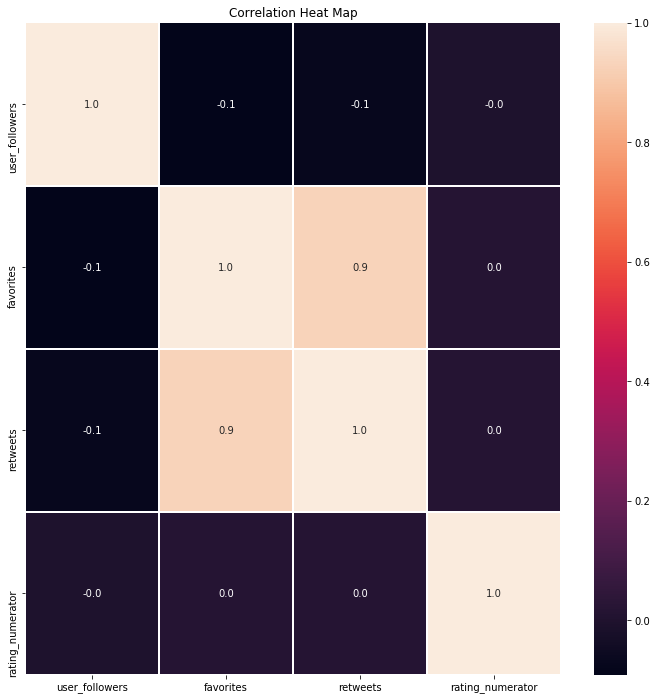

In [59]:
#correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df_twitter_clean[['source','user_followers','favorites','retweets',
               'rating_numerator']].corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)
plt.title('Correlation Heat Map')

(-1.2880425899576236,
 1.2294910472489025,
 -1.242045058494045,
 1.2111704804959476)

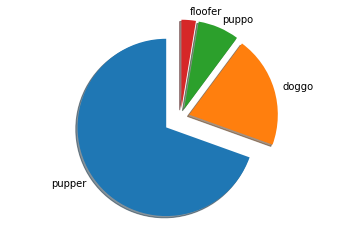

In [60]:
#Pie chart of Life stage of dogs
df_count_stages = list(df_twitter_clean[df_twitter_clean['life_stage'] != 'None']['life_stage'].value_counts())[0:4]
life_stages = df_twitter_clean[df_twitter_clean['life_stage'] != 'None']['life_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) #we can use the explosion property of slices of a pie chart to make it more efficient

figure1, axis1 = plt.subplots()
axis1.pie(df_count_stages, explode = explode, labels = life_stages, shadow = True, startangle = 90)
axis1.axis('equal')

Text(0.5,1,'Retweets and favorites Scatter plot')

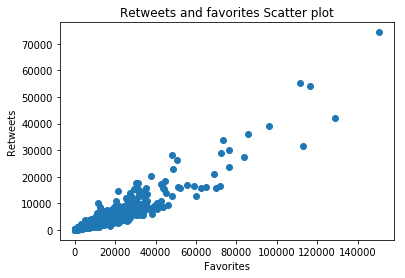

In [61]:
#Scatter plot between favorites and retweets.
plt.scatter(df_twitter_clean['favorites'], df_twitter_clean['retweets'])
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

Analysis

-There is strong correlation between favorites and retweets.

-Negative correlation between user followers and retweets.

-Dogs in Pupper stage get most tweets, which is expected.

-There is a big positive 0.9 correlation shown by correlation heat map between the retweets and favorites.

Conclusion

Through all the analysis I made,I can say that the twitter data of WeRateDogs gives us a lot of interesting perceptions about people's tweet about the different breeds of dogs w:r:t their different life stages. Moreover, it is clear that having more followers on twitter doesn't increase the retweets of user's tweet.

